In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import pairanomaly_json_path, pairanomaly_kbfilter_json_path

with open(pairanomaly_json_path, 'r') as f:
    stats = json.load(f)
with open(pairanomaly_kbfilter_json_path, 'r') as f:
    stats_kb_filter = json.load(f)
    
no_hist = stats['no_histogram']
with_hist = stats['with_histogram']
no_hist_kbfilter = stats_kb_filter['no_histogram']
with_hist_kbfilter = stats_kb_filter['with_histogram']

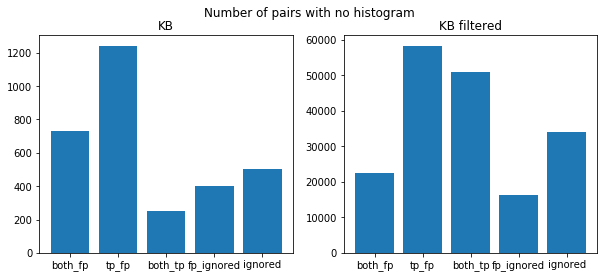

In [2]:
fig, ax = plt.subplots(1,2, figsize = [10,4])
ax[0].bar(no_hist.keys(), no_hist.values())
ax[0].set_title("KB")
ax[1].bar(no_hist_kbfilter.keys(), no_hist_kbfilter.values())
ax[1].set_title("KB filtered")
plt.suptitle("Number of pairs with no histogram")
plt.show()

<Figure size 432x288 with 0 Axes>

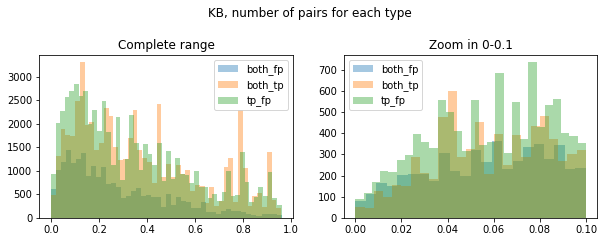

<Figure size 432x288 with 0 Axes>

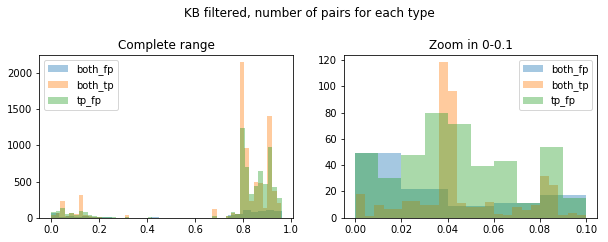

In [3]:
plt.figure()
fig, ax = plt.subplots(1,2,figsize=[10,3])
for opt in ['both_fp','both_tp','tp_fp']:#with_hist:
    sns.distplot(with_hist[opt]['l'], label=opt, ax=ax[0], kde=False, norm_hist=False)
    to_plot = np.array(with_hist[opt]['l'])
    to_plot=to_plot[to_plot<0.1]
    sns.distplot(to_plot, label=opt, ax=ax[1], kde=False, norm_hist=False)
ax[0].legend()
ax[0].set_title('Complete range')
ax[1].set_title('Zoom in 0-0.1')
ax[1].legend()
fig.suptitle("KB, number of pairs for each type", position=(0.5,1.1))

plt.figure()
fig, ax = plt.subplots(1,2,figsize=[10,3])
for opt in ['both_fp','both_tp','tp_fp']:#with_hist:
    sns.distplot(with_hist_kbfilter[opt]['l'], label=opt, ax=ax[0], kde=False, norm_hist=False)
    to_plot = np.array(with_hist_kbfilter[opt]['l'])
    to_plot=to_plot[to_plot<0.1]
    sns.distplot(to_plot, label=opt, ax=ax[1], kde=False, norm_hist=False)
ax[0].set_title('Complete range')
ax[1].set_title('Zoom in 0-0.1')
ax[0].legend()
ax[1].legend()
fig.suptitle("KB filtered, number of pairs for each type", position=(0.5,1.1))
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


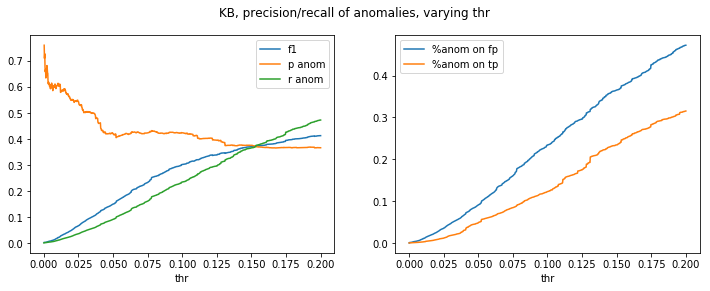

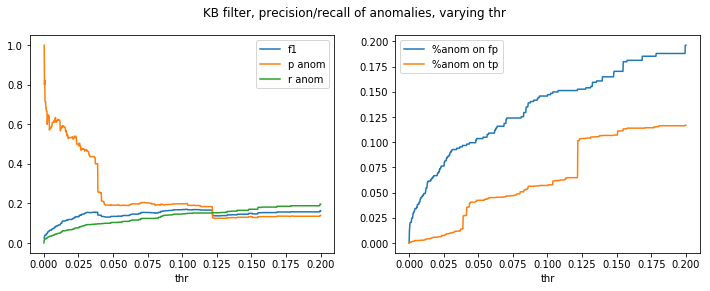

In [4]:


def plot_prstats(fpfp, tptp, title):
    thr_list=[]
    f1_list=[]
    p_list=[]
    r_list=[]
    perc_fp=[]
    perc_tp=[]
    for thr in np.linspace(0,0.2,1000):
        fpfp_an = (fpfp<thr).sum()
        tptp_an = (tptp<thr).sum()
        fpfp_cor = (fpfp>=thr).sum()
        tptp_cor = (tptp>=thr).sum()



        r_an = fpfp_an/len(fpfp)
        p_an = (fpfp_an)/(fpfp_an+tptp_an)
        r_cor = tptp_cor/len(tptp)
        p_cor = (tptp_cor)/(fpfp_cor+tptp_cor)
        f1_an=2*(r_an*p_an)/(r_an+p_an)

        p_list.append(p_an)
        r_list.append(r_an)
        f1_list.append(f1_an)
        thr_list.append(thr)
        perc_fp.append(fpfp_an/(len(fpfp)))
        perc_tp.append(tptp_an/(len(tptp)))

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(thr_list,f1_list, label='f1')
    plt.plot(thr_list,p_list, label='p anom')
    plt.plot(thr_list,r_list, label='r anom')
    plt.xlabel('thr')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(thr_list,perc_fp, label='%anom on fp')
    plt.plot(thr_list,perc_tp, label='%anom on tp')
    plt.xlabel('thr')
    plt.legend()
    plt.suptitle(title)
    
fpfp = np.array(with_hist['both_fp']['l'])
tptp = np.array(with_hist['both_tp']['l'])
plot_prstats(fpfp, tptp, 'KB, precision/recall of anomalies, varying thr')
fpfp = np.array(with_hist_kbfilter['both_fp']['l'])
tptp = np.array(with_hist_kbfilter['both_tp']['l'])
plot_prstats(fpfp, tptp, 'KB filter, precision/recall of anomalies, varying thr')

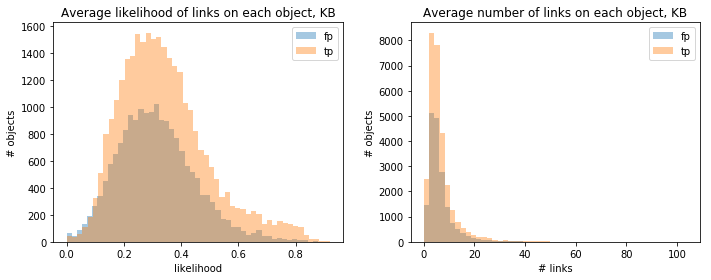

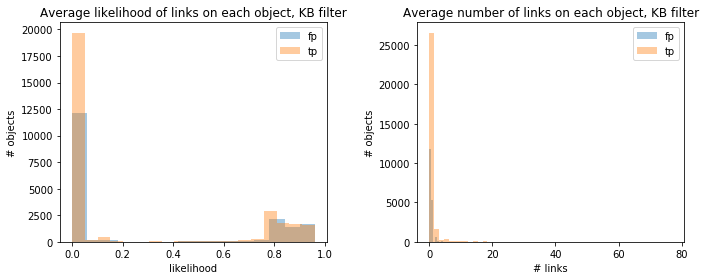

In [5]:
from config import objectanomaly_json_path, objectanomaly_kbfilter_json_path

thr = '01'

with open(f"{objectanomaly_json_path[:-5]}_{thr}.json", 'r') as f:
    obj_anomaly = json.load(f)
with open(f"{objectanomaly_kbfilter_json_path[:-5]}_{thr}.json", 'r') as f:
    obj_anomaly_kbfilter = json.load(f)


def print_average_objcores(obj_an, kbfilter):
    fig, ax = plt.subplots(1,2,figsize=[10,4])
    sns.distplot(np.sort(np.array(obj_an['fp']['avg_l'])), ax=ax[0], label='fp', kde=False, norm_hist=False)
    sns.distplot(np.sort(np.array(obj_an['tp']['avg_l'])), ax=ax[0], label='tp', kde=False, norm_hist=False)
    ax[0].set_title(f'Average likelihood of links on each object, {kbfilter}')
    ax[0].set_xlabel('likelihood')
    ax[0].set_ylabel('# objects')
    ax[0].legend()
    sns.distplot(np.sort(np.array(obj_an['fp']['n_links'])), ax=ax[1], label='fp', kde=False, norm_hist=False)
    sns.distplot(np.sort(np.array(obj_an['tp']['n_links'])), ax=ax[1], label='tp', kde=False, norm_hist=False)
    ax[1].legend()
    ax[1].set_title(f'Average number of links on each object, {kbfilter}')
    ax[1].set_xlabel('# links')
    ax[1].set_ylabel('# objects')
    plt.tight_layout()

print_average_objcores(obj_anomaly, "KB")
print_average_objcores(obj_anomaly_kbfilter, "KB filter")


KB
Recall of anomalies: 0.0007
Precision of anomalies: 1.0
Recall of normal data: 1.0
Precision of normal data: 0.62
=Can find 0.1% of fp with precision 100.0.

KB filtered
Recall of anomalies: 0.0054
Precision of anomalies: 0.66
Recall of normal data: 1.0
Precision of normal data: 0.62
=Can find 0.5% of fp with precision 70.0.

KB filtered
Recall of anomalies: 0.0035
Precision of anomalies: 0.62
Recall of normal data: 1.0
Precision of normal data: 0.62
=Can find 0.4% of fp with precision 60.0.


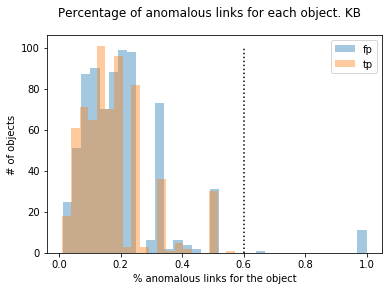

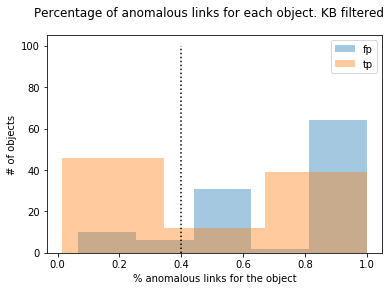

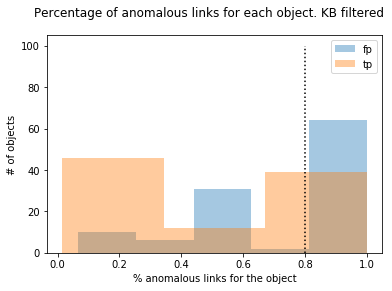

In [6]:
def plot_obj_num_anom_links(obj_an, kbfilter, thr):
    perc_anom_fp = np.sort(np.array(obj_an['fp']['perc_anom']))
    perc_anom_tp = np.sort(np.array(obj_an['tp']['perc_anom']))

    plt.figure()
    sns.distplot(perc_anom_fp[perc_anom_fp>0.0], label='fp', kde=False, norm_hist=False)
    sns.distplot(perc_anom_tp[perc_anom_tp>0.0], label='tp', kde=False, norm_hist=False)
    plt.legend()
    plt.suptitle(f'Percentage of anomalous links for each object. {kbfilter}')
    plt.xlabel('% anomalous links for the object')
    plt.ylabel('# of objects')
    plt.vlines([thr], ymin=0,ymax=100, linestyle=':')
    print("\n"+kbfilter)
    recallAnom = round((perc_anom_fp>thr).sum()/len(perc_anom_fp),4)
    recallNorm = round((perc_anom_tp<=thr).sum()/len(perc_anom_tp),2)
    precAnom = round((perc_anom_fp>thr).sum()/((perc_anom_fp>thr).sum()+(perc_anom_tp>thr).sum()),2)
    precNorm = round((perc_anom_tp<=thr).sum()/((perc_anom_tp<=thr).sum()+(perc_anom_fp<=thr).sum()),2)
    print(f"Recall of anomalies: {recallAnom}")
    print(f"Precision of anomalies: {precAnom}")
    print(f"Recall of normal data: {recallNorm}")
    print(f"Precision of normal data: {precNorm}")
    print(f"=Can find {round(recallAnom*100,1)}% of fp with precision {round(precAnom,1)*100}.")

# 0.01
plot_obj_num_anom_links(obj_anomaly, 'KB', 0.6)
plot_obj_num_anom_links(obj_anomaly_kbfilter, 'KB filtered', 0.4)
plot_obj_num_anom_links(obj_anomaly_kbfilter, 'KB filtered', 0.8)
# 0.001
# plot_obj_num_anom_links(obj_anomaly, 'KB', 0.45)
# plot_obj_num_anom_links(obj_anomaly_kbfilter, 'KB filtered', 0.3)
# plot_obj_num_anom_links(obj_anomaly_kbfilter, 'KB filtered', 0.77)